In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('https://cocl.us/datascience_survey_data', index_col=0)

print('Dataset downloaded and read into a pandas dataframe!')

Dataset downloaded and read into a pandas dataframe!


In [3]:
df.head()

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136


In [4]:
%matplotlib inline

import matplotlib.pyplot as plt

In [5]:
total = 2233
df['Very interested'] = round(df['Very interested'] / total, 2)
df['Somewhat interested'] = round(df['Somewhat interested'] / total, 2)
df['Not interested'] = round(df['Not interested'] / total, 2)

df.head()

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),0.60,0.33,0.06
Data Analysis / Statistics,0.76,0.20,0.03
Data Journalism,0.19,0.48,0.27
Data Visualization,0.60,0.33,0.05
Deep Learning,0.57,0.34,0.06


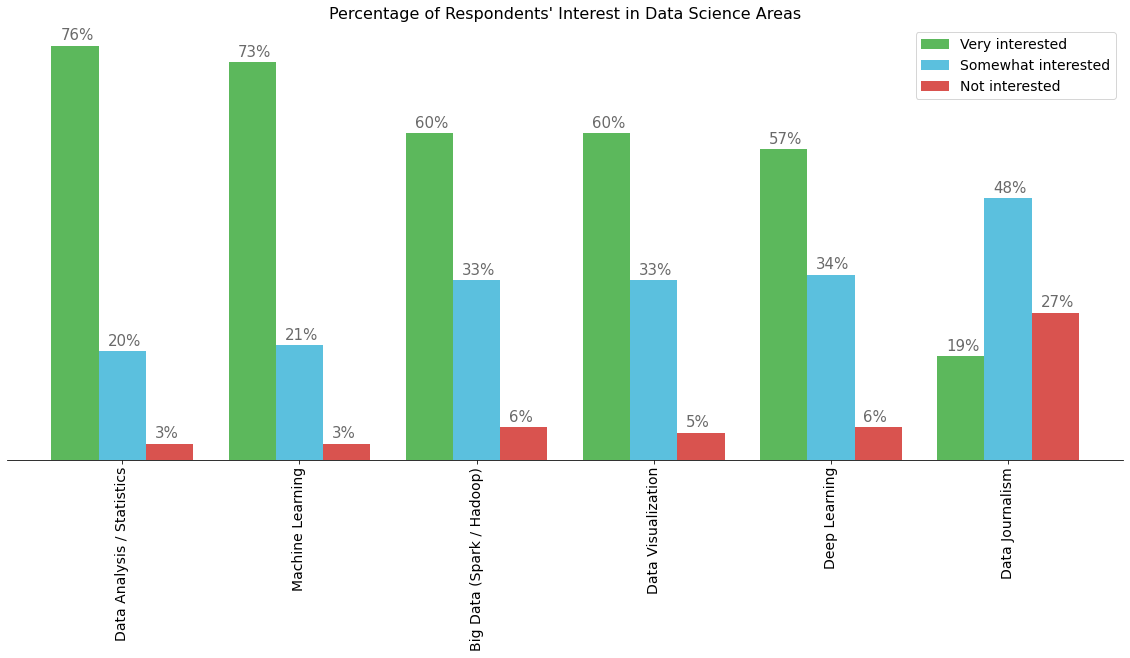

In [6]:
df.sort_values('Very interested', ascending=False, inplace=True)
ax = df.plot(kind='bar', figsize=(20, 8), width=0.8, color=['#5cb85c', '#5bc0de', '#d9534f'], fontsize=14)
ax.legend(fontsize=14)
ax.set_title(label='Percentage of Respondents\' Interest in Data Science Areas', fontsize=16)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_yaxis().set_visible(False)

# https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart
for patch in ax.patches:
    ax.text(patch.get_x() + 0.05, patch.get_height() + 0.01, "{0:.0%}".format(patch.get_height()), fontsize=15, color='dimgrey')

In [37]:
df = pd.read_csv('https://cocl.us/sanfran_crime_dataset',index_col =0)
df.head()

,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
IncidntNum,,,,,,,,,,,,
120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [41]:
df_neighborhood = df['PdDistrict'].value_counts().reset_index()
df_neighborhood.rename(columns={'index': 'Neighborhood', 'PdDistrict': 'Count'},inplace = True)
df_neighborhood

,Neighborhood,Count
0,SOUTHERN,28445
1,NORTHERN,20100
2,MISSION,19503
3,CENTRAL,17666
4,BAYVIEW,14303
5,INGLESIDE,11594
6,TARAVAL,11325
7,TENDERLOIN,9942
8,RICHMOND,8922
9,PARK,8699


In [42]:
import folium
!pip install wget
import wget

In [43]:
wget.download('https://cocl.us/sanfran_geojson', 'sf.json')
geo = r'sf.json' # geojson file

In [44]:
# create a plain SF map
sf_map = folium.Map(location=[37.77, -122.42], zoom_start=12)

In [45]:
# generate choropleth map
sf_map.choropleth(
    geo_data=geo,
    data=df_neighborhood,
    columns=['Neighborhood', 'Count'],
    key_on='features.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in San Francisco'
)

# display map
sf_map


AttributeError: 'NoneType' object has no attribute 'get'